In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mne.decoding import Vectorizer
from sklearn.preprocessing import MinMaxScaler
from mne.decoding import SPoC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split as tts
import mne
from sklearn.model_selection import StratifiedKFold
from mne.datasets import sample
from mne.decoding import (SlidingEstimator, GeneralizingEstimator,
                          cross_val_multiscore, LinearModel, get_coef)

import os
import os.path as op
from os import listdir
from os.path import isfile, join

In [72]:
epochs1=mne.read_epochs('C:\\Users\\new user\\EEG data\\data\\Ex10_Suj1_Run3-epo.fif',preload=True)
epochs = epochs1[(epochs1.events[:,2] == 4) | (epochs1.events[:,2] == 5)]

Reading C:\Users\new user\EEG data\data\Ex10_Suj1_Run3-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
287 matching events found
Created an SSP operator (subspace dimension = 1)
287 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated


In [112]:
X = epochs.get_data()  # EEG signals: n_epochs, n_channels, n_times
y = epochs.events[:, 2]
clf = make_pipeline(Vectorizer(),
                    #PCA(),
                        #StandardScaler(),
                       #KNN(n_neighbors=1))
                 KNN(n_neighbors=7)
                   )
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
    
clf.fit(X_train, y_train)
    
score = clf.score(X_test, y_test)
print(score)

0.577777777778


In [10]:
def filter_events(epochs, filter_for):

    
    if len(filter_for) >= len(epochs.event_id):
        return epochs
    
    else:
        temp_epochs = []
        for i in range(len(filter_for)):
            temp_epochs.append(epochs[epochs.events[:,-1] == filter_for[i]])
        
        return mne.concatenate_epochs(temp_epochs)

In [11]:
def get_samples_targets(epochs):
    X = epochs.get_data();
    y = epochs.events[:,-1]
    return X, y

In [113]:
def classify_test(X,y):

    clf = make_pipeline(Vectorizer(),
                        #StandardScaler(),
                        KNN(n_neighbors=10))
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
    
    clf.fit(X_train, y_train)
    
    score = clf.score(X_test, y_test)
    
    return score

In [114]:
scores = []

path = 'C:\\Users\\new user\\EEG data\\data'
subject_runs = [f for f in listdir(path) if isfile(join(path, f))]

subject_runs.remove('Ex10_Suj26_Run2-epo.fif')
subject_runs.remove('Ex10_Suj21_Run1-epo.fif')
subject_runs.remove('Ex10_Suj26_Run3-epo.fif')
subject_runs.remove('Ex10_Suj26_Run4-epo.fif')
for f in subject_runs:
    epochs = mne.read_epochs(op.join(path, f),
                          preload=True);
    epochs = filter_events(epochs, [4,5])
    X,y = get_samples_targets(epochs)
    scores.append([f, classify_test(X,y)])

Reading C:\Users\new user\EEG data\data\Ex10_Suj10_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
294 matching events found
Created an SSP operator (subspace dimension = 1)
294 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
149 matching events found
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
Reading C:\Users\new user\EEG data\data\Ex10_Suj10_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
286 matching events found
Created an SSP operator (subspace dimension = 1)
286 matching events found
Created an SSP operator (subspace dimensio

301 matching events found
Created an SSP operator (subspace dimension = 1)
301 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
151 matching events found
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
Reading C:\Users\new user\EEG data\data\Ex10_Suj14_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
281 matching events found
Created an SSP operator (subspace dimension = 1)
281 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
138 matching events found
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
Reading C:\Users\new user\EEG data\data\Ex10_Suj14_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 

Reading C:\Users\new user\EEG data\data\Ex10_Suj17_Run3-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
287 matching events found
Created an SSP operator (subspace dimension = 1)
287 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
142 matching events found
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
Reading C:\Users\new user\EEG data\data\Ex10_Suj17_Run4-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
289 matching events found
Created an SSP operator (subspace dimension = 1)
289 matching events found
Created an SSP operator (subspace dimensio

302 matching events found
Created an SSP operator (subspace dimension = 1)
302 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
151 matching events found
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
Reading C:\Users\new user\EEG data\data\Ex10_Suj20_Run3-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
303 matching events found
Created an SSP operator (subspace dimension = 1)
303 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
152 matching events found
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
Reading C:\Users\new user\EEG data\data\Ex10_Suj20_Run4-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 

Reading C:\Users\new user\EEG data\data\Ex10_Suj24_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
271 matching events found
Created an SSP operator (subspace dimension = 1)
271 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
128 matching events found
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
Reading C:\Users\new user\EEG data\data\Ex10_Suj24_Run3-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
259 matching events found
Created an SSP operator (subspace dimension = 1)
259 matching events found
Created an SSP operator (subspace dimensio

238 matching events found
Created an SSP operator (subspace dimension = 1)
238 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
116 matching events found
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
Reading C:\Users\new user\EEG data\data\Ex10_Suj28_Run4-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
241 matching events found
Created an SSP operator (subspace dimension = 1)
241 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
117 matching events found
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
Reading C:\Users\new user\EEG data\data\Ex10_Suj2_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x

Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
256 matching events found
Created an SSP operator (subspace dimension = 1)
256 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
124 matching events found
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
Reading C:\Users\new user\EEG data\data\Ex10_Suj5_Run4-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
221 matching events found
Created an SSP operator (subspace dimension = 1)
221 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
106 matching events found
Created

282 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
135 matching events found
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
Reading C:\Users\new user\EEG data\data\Ex10_Suj9_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
298 matching events found
Created an SSP operator (subspace dimension = 1)
298 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
148 matching events found
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
Reading C:\Users\new user\EEG data\data\Ex10_Suj9_Run3-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    14

In [115]:
scores=np.array(scores)
print(scores)

[['Ex10_Suj10_Run1-epo.fif' '0.555555555556']
 ['Ex10_Suj10_Run2-epo.fif' '0.690476190476']
 ['Ex10_Suj10_Run3-epo.fif' '0.52380952381']
 ['Ex10_Suj10_Run4-epo.fif' '0.688888888889']
 ['Ex10_Suj11_Run1-epo.fif' '0.842105263158']
 ['Ex10_Suj11_Run2-epo.fif' '0.888888888889']
 ['Ex10_Suj11_Run4-epo.fif' '0.769230769231']
 ['Ex10_Suj12_Run1-epo.fif' '0.458333333333']
 ['Ex10_Suj12_Run2-epo.fif' '0.422222222222']
 ['Ex10_Suj12_Run3-epo.fif' '0.428571428571']
 ['Ex10_Suj12_Run4-epo.fif' '0.585365853659']
 ['Ex10_Suj13_Run1-epo.fif' '0.5']
 ['Ex10_Suj13_Run2-epo.fif' '0.444444444444']
 ['Ex10_Suj13_Run3-epo.fif' '0.6']
 ['Ex10_Suj13_Run4-epo.fif' '0.521739130435']
 ['Ex10_Suj14_Run1-epo.fif' '0.47619047619']
 ['Ex10_Suj14_Run2-epo.fif' '0.466666666667']
 ['Ex10_Suj14_Run3-epo.fif' '0.571428571429']
 ['Ex10_Suj14_Run4-epo.fif' '0.547619047619']
 ['Ex10_Suj15_Run1-epo.fif' '0.688888888889']
 ['Ex10_Suj15_Run2-epo.fif' '0.577777777778']
 ['Ex10_Suj15_Run3-epo.fif' '0.622222222222']
 ['Ex10_Suj1

In [108]:
values = [float(x) for x in scores[:,-1]]

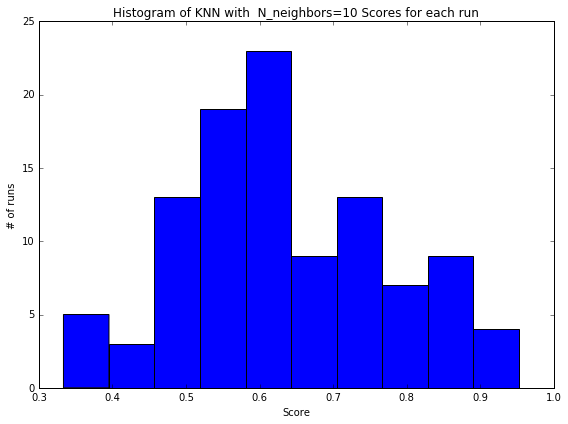

In [111]:
fig, ax = plt.subplots(figsize = (8,6))
ax.hist(values, bins = 10);
ax.set_title('Histogram of KNN with  N_neighbors=10 Scores for each run')
ax.set_xlabel('Score')
ax.set_ylabel('# of runs')
fig.tight_layout()

In [110]:
print("mean: ",np.mean(values))
print("max: ",np.max(values))
print("min: ",np.min(values))

('mean: ', 0.6340092753697808)
('max: ', 0.95238095238099996)
('min: ', 0.33333333333300003)


In [8]:
socre1=np.array([0.555555555556,
 0.690476190476,
  0.52380952381,
 0.688888888889,
 0.842105263158,
 0.888888888889,
 0.769230769231,
 0.458333333333,
 0.422222222222,
 0.428571428571,
 0.585365853659])

In [23]:
socre2=np.array([0.488888888889,
 0.738095238095,
  0.5,
 0.7111111111,
 0.842105263158,
 0.888888888889,
 0.769230769231,
 0.333333333333,
 0.466666666666,
 0.357142857143,
 0.512195121951])

score=np.concatenate(socre1,socre2)

TypeError: only length-1 arrays can be converted to Python scalars

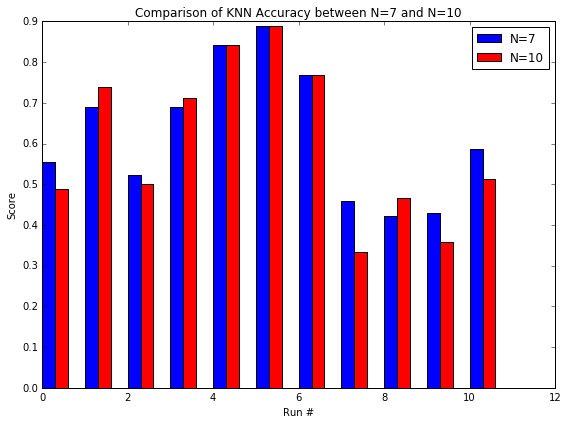

In [40]:
index=np.arange(11)
w=0.3
fig, ax = plt.subplots(figsize = (8,6))
rects1=ax.bar(index,socre1,w)
rects2=ax.bar(index+w,socre2,w,color="red")
ax.set_title('Comparison of KNN Accuracy between N=7 and N=10')
ax.set_xlabel('Run #')
ax.set_ylabel('Score')
ax.legend( (rects1[0], rects2[0]), ('N=7', 'N=10') )
fig.tight_layout()
#plt.hold(True)

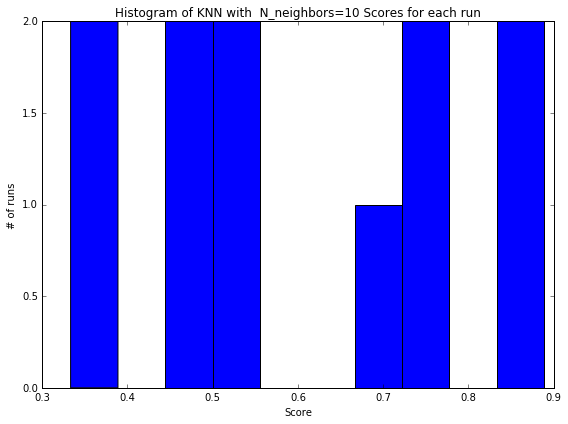

In [17]:
fig, ax = plt.subplots(figsize = (8,6))
ax.hist(socre2, bins = 10,color=);
ax.set_title('Histogram of KNN with  N_neighbors=10 Scores for each run')
ax.set_xlabel('Score')
ax.set_ylabel('# of runs')
fig.tight_layout()
plt.hold(True)